<a href="https://colab.research.google.com/github/BarryBadhusha/MachineLearning_Binge/blob/master/SVR(Support_Vector_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [192]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


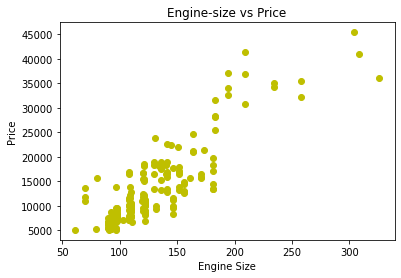

In [193]:
plt.scatter(df['engine-size'],df['price'],color='y')
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title('Engine-size vs Price')
plt.show()
plt.close()

In [0]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [0]:
def print_output(X,Y,svr):
  print("C: {}".format(svr.C))
  print("Epsilon: {}".format(svr.epsilon))
    
  print("Intercept: {:,.3f}".format(svr.intercept_[0]))
  # print("Coefficient: {:,.3f}".format(svr.coef_[0]))
    
  mae = mean_absolute_error(Y, svr.predict(X))
  print("MAE = ${:,.2f}".format(1000*mae))
      
  perc_within_eps = 100*np.sum(Y - svr.predict(X) < eps) / len(Y)
  print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))
  plt.figure(figsize=(10,7))
  plt.scatter(x=X, y=Y)
  plt.plot(X, svr.predict(X), color='red')
  plt.plot(X, svr.predict(X)+eps, color='black')
  plt.plot(X, svr.predict(X)-eps, color='black')
  plt.xlabel('# of Rooms')
  plt.ylabel('House Price (Thousands of Dollars)')
  plt.title('SVR Prediction')
  plt.show()

In [0]:
eps = 1

In [0]:
X = np.array(df['engine-size']).reshape(-1,1)
Y = np.array(df['price']).reshape(-1,1)

In [0]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
Y = sc_y.fit_transform(Y)

In [199]:
svr = SVR(kernel='linear',epsilon=eps,C=1)
svr.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

C: 1
Epsilon: 1
Intercept: 0.245
MAE = $483.58
Percentage within Epsilon = 17,722.39%


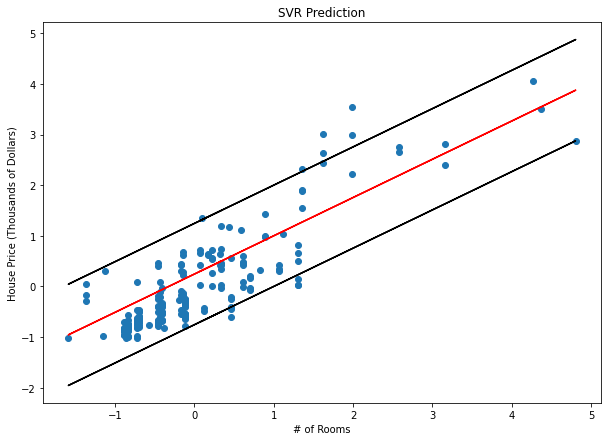

In [200]:
print_output(X,Y,svr)

In [201]:
svr_ = SVR(kernel='linear',epsilon=eps,C=6)
svr_.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=6, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

C: 6
Epsilon: 1
Intercept: 0.245
MAE = $483.58
Percentage within Epsilon = 17,722.39%


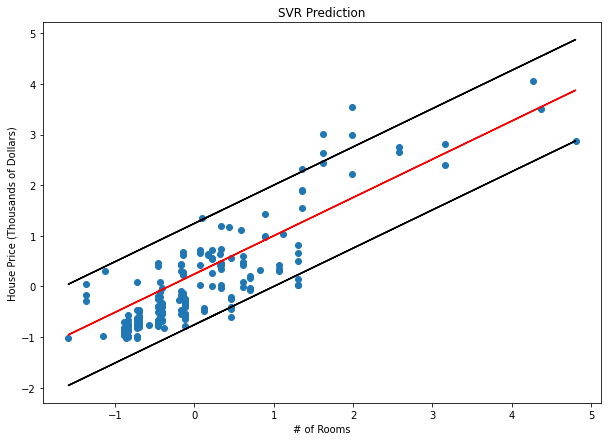

In [202]:
print_output(X,Y,svr_)

In [0]:
test_mae_list = []
perc_within_eps_list = []

eps = eps
c_space = np.linspace(0.01, 10)
for c in c_space:
    varied_svr = SVR(epsilon=eps, C=c,kernel='linear')
    
    varied_svr.fit(X,Y)
    
    test_mae = mean_absolute_error(Y, varied_svr.predict(X))
    test_mae_list.append(test_mae)
    
    perc_within_eps = 100*np.sum(abs(Y-varied_svr.predict(X)) <= eps) / len(Y)
    perc_within_eps_list.append(perc_within_eps)



In [205]:
m = max(perc_within_eps_list)
inds = [i for i, j in enumerate(perc_within_eps_list) if j == m]
C = c_space[inds[0]]

print("best C =", C)

best C = 0.21387755102040817


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C: 0.21387755102040817
Epsilon: 1
Intercept: 0.274
MAE = $509.67
Percentage within Epsilon = 17,875.12%


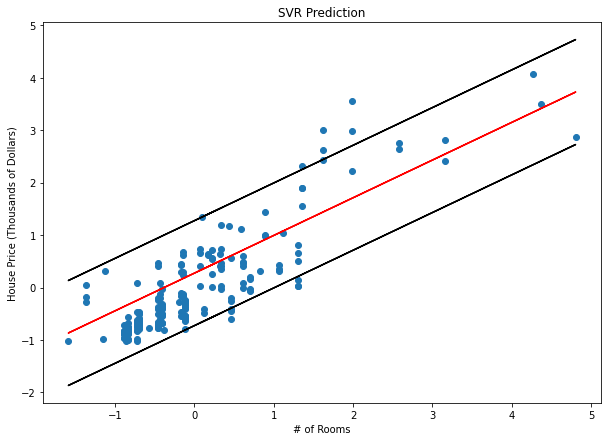

In [206]:
svr_best = SVR(kernel='linear',epsilon=eps,C=0.21387755102040817)
svr_best.fit(X,Y)
print_output(X,Y,svr_best)